<a href="https://colab.research.google.com/github/lizardnote/ML_practice/blob/main/%EB%B9%85%EB%B6%84%EA%B8%B0_ch2_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pandas
표 형태 데이터를 효율적으로 다루고 분석하는데 유용한 라이브러리

In [ ]:
import numpy as np
import pandas as pd

### 데이터프레임 생성
- 데이터프레임의 각 열은 Series로 구성된다.
- Series는 1차원 배열과 유사하지만, 각 요소에 대한 index를 가지고 있다.

In [ ]:
df = pd.DataFrame({
    'col1' : [1, 2, 3],
    'col2' : ["a", "b", "c"]
})
print(df)

   col1 col2
0     1    a
1     2    b
2     3    c


In [ ]:
print(df['col1'].dtype)
print(df['col2'].dtype)

int64
object


In [ ]:
#빈 데이터 프레임 생성
df = pd.DataFrame()
print(df)

Empty DataFrame
Columns: []
Index: []


In [ ]:
my_df = pd.DataFrame({
    '실수' : pd.Series(dtype = 'float'),
    '문자열' : pd.Series(dtype = 'str'),
    '정수' : pd.Series(dtype = 'int'),
    '논리' : pd.Series(dtype = 'bool')
})
print(my_df)
print(my_df.dtypes)

Empty DataFrame
Columns: [실수, 문자열, 정수, 논리]
Index: []
실수     float64
문자열     object
정수       int64
논리        bool
dtype: object


### csv 파일 읽어오기

In [ ]:
url = "https://raw.githubusercontent.com/YoungjinBD/data/main/examscore.csv"
df = pd.read_csv(url)
print(df)

    student_id gender  midterm  final
0            1      F       38     46
1            2      M       42     67
2            3      F       53     56
3            4      M       48     54
4            5      M       46     39
5            6      M       51     74
6            7      M       48     36
7            8      M       43     58
8            9      M       28     25
9           10      M       38     59
10          11      F       50     40
11          12      F       29     44
12          13      M       27     25
13          14      M       36     28
14          15      M       29     47
15          16      F       34     39
16          17      F       35     57
17          18      F       46     86
18          19      M       39     16
19          20      M        9     33
20          21      M       76     79
21          22      M       15     12
22          23      M       63     77
23          24      M       28     55
24          25      M       49     58
25          

In [ ]:
print(df.shape)
print(df.head())

(30, 4)
   student_id gender  midterm  final
0           1      F       38     46
1           2      M       42     67
2           3      F       53     56
3           4      M       48     54
4           5      M       46     39


In [ ]:
df.iloc[1]

,1
student_id,2
gender,M
midterm,42
final,67


In [ ]:
df[['gender', 'student_id']]

,gender,student_id
0,F,1
1,M,2
2,F,3
3,M,4
4,M,5
5,M,6
6,M,7
7,M,8
8,M,9
9,M,10


### iloc, loc
- iloc : 정수 기반 인덱싱 / 행과 열의 정수 위치로 데이터 필터링
  - 주의 : df[1:5] 라고 하면 인덱스 값 자체를 지정 / df[: 5 , : 5] 라고 하면 범위 슬라이싱이므로 0~4 까지 인덱스 출력
  - 짝수행만 출력하고 싶다면 df[::2, :]
- loc : 라벨 기반 인덱싱 / 행과 열의 라벨을 활용해 필터링

In [ ]:
df.iloc[1:5,1:5]

,gender,midterm,final
1,M,42,67
2,F,53,56
3,M,48,54
4,M,46,39


In [ ]:
df.loc[df['midterm'] <= 15]

,student_id,gender,midterm,final
19,20,M,9,33
21,22,M,15,12


In [ ]:
df[df['midterm'] <= 15]

,student_id,gender,midterm,final
19,20,M,9,33
21,22,M,15,12


In [ ]:
df.loc[df['midterm'] <= 15, :]

,student_id,gender,midterm,final
19,20,M,9,33
21,22,M,15,12


In [ ]:
df.loc[df['midterm'] <= 15,['student_id','gender']]

,student_id,gender
19,20,M
21,22,M


### isin
특정 값만 선택/ 제외 가능

In [ ]:
df[df['midterm'].isin([28,38,52])]

,student_id,gender,midterm,final
0,1,F,38,46
8,9,M,28,25
9,10,M,38,59
23,24,M,28,55
27,28,F,52,66
29,30,M,52,65


In [ ]:
df.loc[  df['midterm'].isin([28,38,52]) ,  ['student_id','final']  ]

,student_id,final
0,1,46
8,9,25
9,10,59
23,24,55
27,28,66
29,30,65


In [ ]:
df.loc[ ~ df['midterm'].isin([28,38,52]) ,  ['student_id','final']  ]

,student_id,final
1,2,67
2,3,56
3,4,54
4,5,39
5,6,74
6,7,36
7,8,58
10,11,40
11,12,44
12,13,25


### 결측값 확인

- isna() : true false로 체크하기 때문에 sum()함수랑 같이 사용해서 NaN 개수 확인 가능
- dropna() : 모든 열이 꽉 채워진 완전한 행들만 반환

In [ ]:
df.isna().sum()

,0
student_id,0
gender,0
midterm,0
final,0


In [ ]:
mydata = pd.DataFrame({
    'student_id' : [1,2,3,4,5],
    'gender' : ['F', 'M', 'F', 'M', 'M'],
    'midterm' : [38,42,53,58,46],
    'final' : [46,67,56,54,39]

})

mydata.iloc[0,1] = np.nan
mydata.iloc[4,0] = np.nan

mydata

,student_id,gender,midterm,final
0,1.0,NaN,38,46
1,2.0,M,42,67
2,3.0,F,53,56
3,4.0,M,58,54
4,NaN,M,46,39


In [ ]:
mydata.isna().sum()

,0
student_id,1
gender,1
midterm,0
final,0


In [ ]:
mydata['gender'].isna().sum()

np.int64(1)

In [ ]:
complete_row = mydata.dropna()

In [ ]:
print(complete_row)

   student_id gender  midterm  final
1         2.0      M       42     67
2         3.0      F       53     56
3         4.0      M       58     54


### 구성원소 변경 / 추가 / 삭제
- df[' new '] = df[' a '] + df[' b ']
- pd.concat() : 행 단위로 아래에 붙도록 파라미터가 asix=0 으로 기본옵션
  -  열(column) 단위로 옆으로 붙이고 싶다면 axis=1
  -  테이블 사이즈가 똑같지 않아 값이 비는 곳은 NaN 값이 들어감
  -  pd.concat([df1,df2])
  - ignore_index = True 옵션
  - join 옵션
  - multi index = key 옵션


In [ ]:
mydata['total'] = mydata['midterm'] + mydata['final']
print(mydata.iloc[0:5, [0,2,3,4]])

   student_id  midterm  final  total
0         1.0       38     46     84
1         2.0       42     67    109
2         3.0       53     56    109
3         4.0       58     54    112
4         NaN       46     39     85


In [ ]:
mydata = pd.concat([mydata, (mydata['total'] / 2).rename('average')], axis = 1)
mydata.head()

,student_id,gender,midterm,final,total,average
0,1.0,NaN,38,46,84,42.0
1,2.0,M,42,67,109,54.5
2,3.0,F,53,56,109,54.5
3,4.0,M,58,54,112,56.0
4,NaN,M,46,39,85,42.5


In [ ]:
mydata.rename(columns = {'average' : 'my_average'},inplace = True) #저장하려면 inplace 옵션 설정 해야함

In [ ]:
mydata

,student_id,gender,midterm,final,total,my_average
0,1.0,NaN,38,46,84,42.0
1,2.0,M,42,67,109,54.5
2,3.0,F,53,56,109,54.5
3,4.0,M,58,54,112,56.0
4,NaN,M,46,39,85,42.5


In [ ]:
del mydata['total']

In [ ]:
mydata

,student_id,gender,midterm,final,my_average
0,1.0,NaN,38,46,42.0
1,2.0,M,42,67,54.5
2,3.0,F,53,56,54.5
3,4.0,M,58,54,56.0
4,NaN,M,46,39,42.5


# pandas method 익히기

In [ ]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/YoungjinBD/data/main/penguins.csv")

In [ ]:
df.head(3)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female


In [ ]:
df.tail(2)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female
343,Gentoo,Biscoe,49.9,16.1,213.0,5400.0,Male


In [ ]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [ ]:
df.sort_values(by = 'bill_length_mm', ascending = False) #기본 값은 오름차순 True

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
253,Gentoo,Biscoe,59.6,17.0,230.0,6050.0,Male
169,Chinstrap,Dream,58.0,17.8,181.0,3700.0,Female
321,Gentoo,Biscoe,55.9,17.0,228.0,5600.0,Male
215,Chinstrap,Dream,55.8,19.8,207.0,4000.0,Male
335,Gentoo,Biscoe,55.1,16.0,230.0,5850.0,Male
...,...,...,...,...,...,...,...
70,Adelie,Torgersen,33.5,19.0,190.0,3600.0,Female
98,Adelie,Dream,33.1,16.1,178.0,2900.0,Female
142,Adelie,Dream,32.1,15.5,188.0,3050.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.sort_values(by = ['bill_length_mm', 'bill_depth_mm'], ascending = [False, True])

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
253,Gentoo,Biscoe,59.6,17.0,230.0,6050.0,Male
169,Chinstrap,Dream,58.0,17.8,181.0,3700.0,Female
321,Gentoo,Biscoe,55.9,17.0,228.0,5600.0,Male
215,Chinstrap,Dream,55.8,19.8,207.0,4000.0,Male
335,Gentoo,Biscoe,55.1,16.0,230.0,5850.0,Male
...,...,...,...,...,...,...,...
70,Adelie,Torgersen,33.5,19.0,190.0,3600.0,Female
98,Adelie,Dream,33.1,16.1,178.0,2900.0,Female
142,Adelie,Dream,32.1,15.5,188.0,3050.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN


In [ ]:
df['bill_length_mm'].idxmax()

253

In [ ]:
min_idx = df['bill_length_mm'].idxmin()
print(f"Minimum bill length index : {min_idx}")
print(df.iloc[min_idx])

Minimum bill length index : 142
species              Adelie
island                Dream
bill_length_mm         32.1
bill_depth_mm          15.5
flipper_length_mm     188.0
body_mass_g          3050.0
sex                  Female
Name: 142, dtype: object


In [ ]:
sorted_df = df.sort_values(by = 'bill_length_mm', ascending = False)
sorted_max = sorted_df.iloc[0]

In [ ]:
max_idx = df['bill_length_mm'].idxmax()
print(f"Minimum bill length index : {max_idx}")
max_row = df.iloc[max_idx]

Minimum bill length index : 253


In [ ]:

comparison = max_row.equals(sorted_max)
print(comparison)

True


In [ ]:
#group by
grouped_df = df.groupby('species').mean(numeric_only=True
                                      )
print(grouped_df)

           bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
species                                                                 
Adelie          38.791391      18.346358         189.953642  3700.662252
Chinstrap       48.833824      18.420588         195.823529  3733.088235
Gentoo          47.504878      14.982114         217.186992  5076.016260


In [ ]:
df.mean(numeric_only = True)

,0
bill_length_mm,43.921930
bill_depth_mm,17.151170
flipper_length_mm,200.915205
body_mass_g,4201.754386


In [ ]:
df.sum(numeric_only=True)

,0
bill_length_mm,15021.3
bill_depth_mm,5865.7
flipper_length_mm,68713.0
body_mass_g,1437000.0


In [ ]:
group_df = df.groupby('island')['flipper_length_mm'].sum()
group_df

,flipper_length_mm
island,
Biscoe,35021.0
Dream,23941.0
Torgersen,9751.0


In [ ]:
max_flipper_island = group_df.idxmax()
max_flipper_island

'Biscoe'

In [ ]:
print(group_df.loc[max_flipper_island])

35021.0


In [ ]:
group_sum_df = df.groupby('island', as_index = False)['flipper_length_mm'].sum()
group_sum_df

,island,flipper_length_mm
0,Biscoe,35021.0
1,Dream,23941.0
2,Torgersen,9751.0


In [ ]:
group_ex = df.groupby('island')['flipper_length_mm'].sum()
group_ex

,flipper_length_mm
island,
Biscoe,35021.0
Dream,23941.0
Torgersen,9751.0


In [ ]:
sort_group_sum_of  = group_sum_df.sort_values(by = 'flipper_length_mm', ascending = True)
sort_group_sum_of

,island,flipper_length_mm
2,Torgersen,9751.0
1,Dream,23941.0
0,Biscoe,35021.0


### merge

In [ ]:
df1 = pd.DataFrame({'key' : ['A', 'B', 'C'], 'value' : [1,2,3]})
df2 = pd.DataFrame({'key' : ['A','B','D'], 'value' : [4,5,6]})

merge_df = pd.merge(df1, df2, on = 'key', how = 'inner')
merge_df

,key,value_x,value_y
0,A,1,4
1,B,2,5


In [ ]:
data = {
    'name' : ['Alice', 'Bob', 'Charlie'],
    'age' : [25, 30, 35],
    'city' : ['New York', 'San Francisco', 'Los Angeles']
}

df = pd.DataFrame(data)

df

,name,age,city
0,Alice,25,New York
1,Bob,30,San Francisco
2,Charlie,35,Los Angeles


In [ ]:
df_melt = pd.melt(df,
                  id_vars = 'name',
                  value_vars = ['age', 'city'],
                  var_name = 'category',
                  value_name = 'value'
                 )

In [ ]:
df_melt

,name,category,value
0,Alice,age,25
1,Bob,age,30
2,Charlie,age,35
3,Alice,city,New York
4,Bob,city,San Francisco
5,Charlie,city,Los Angeles


In [ ]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/YoungjinBD/data/main/dat.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   school    366 non-null    object 
 1   sex       366 non-null    object 
 2   paid      366 non-null    object 
 3   famrel    366 non-null    int64  
 4   freetime  366 non-null    int64  
 5   goout     356 non-null    float64
 6   Dalc      366 non-null    int64  
 7   Walc      366 non-null    int64  
 8   health    366 non-null    int64  
 9   absences  366 non-null    int64  
 10  grade     366 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 31.6+ KB


In [ ]:
df = df.rename(columns = {'Dalc' : 'dalc', 'Walc': 'walc'})
df

,school,sex,paid,famrel,freetime,goout,dalc,walc,health,absences,grade
0,GP,F,no,4,3,4.0,1,1,3,6,1
1,GP,F,no,5,3,3.0,1,1,3,4,1
2,GP,F,yes,4,3,2.0,2,3,3,10,4
3,GP,F,yes,3,2,2.0,1,1,5,2,9
4,GP,F,yes,4,3,2.0,1,2,5,4,4
...,...,...,...,...,...,...,...,...,...,...,...
361,MS,F,no,1,1,1.0,1,1,5,0,0
362,MS,M,yes,5,5,4.0,4,5,4,11,3
363,MS,M,no,2,4,5.0,3,4,2,3,10
364,MS,M,no,4,4,1.0,3,4,5,0,4


In [ ]:
df.astype({'famrel':'object', 'dalc': 'float64'}).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   school    366 non-null    object 
 1   sex       366 non-null    object 
 2   paid      366 non-null    object 
 3   famrel    366 non-null    object 
 4   freetime  366 non-null    int64  
 5   goout     356 non-null    float64
 6   dalc      366 non-null    float64
 7   walc      366 non-null    int64  
 8   health    366 non-null    int64  
 9   absences  366 non-null    int64  
 10  grade     366 non-null    int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 31.6+ KB


In [ ]:
def classify_famrel(famrel):
  if famrel <= 2:
    return 'Low'
  elif famrel <= 4:
    return 'Medium'
  else:
    return 'High'

In [ ]:
df1 = df.copy()
df1 = df1.assign(famrell_quality = df1['famrel'].apply(classify_famrel))

In [ ]:
df1.head()

,school,sex,paid,famrel,freetime,goout,dalc,walc,health,absences,grade,famrell_quality
0,GP,F,no,4,3,4.0,1,1,3,6,1,Medium
1,GP,F,no,5,3,3.0,1,1,3,4,1,High
2,GP,F,yes,4,3,2.0,2,3,3,10,4,Medium
3,GP,F,yes,3,2,2.0,1,1,5,2,9,Medium
4,GP,F,yes,4,3,2.0,1,2,5,4,4,Medium


In [ ]:
df2 = df.copy()
df2 = df2.assign(famrel = df2['famrel'].apply(classify_famrel))

In [ ]:
df2.head() #기존의 컬럼에 변형

,school,sex,paid,famrel,freetime,goout,dalc,walc,health,absences,grade
0,GP,F,no,Medium,3,4.0,1,1,3,6,1
1,GP,F,no,High,3,3.0,1,1,3,4,1
2,GP,F,yes,Medium,3,2.0,2,3,3,10,4
3,GP,F,yes,Medium,2,2.0,1,1,5,2,9
4,GP,F,yes,Medium,3,2.0,1,2,5,4,4


In [ ]:
df3 = df.copy()
df3['famrel'] = df3['famrel'].apply(classify_famrel)

In [ ]:
df3.head()

,school,sex,paid,famrel,freetime,goout,dalc,walc,health,absences,grade
0,GP,F,no,Medium,3,4.0,1,1,3,6,1
1,GP,F,no,High,3,3.0,1,1,3,4,1
2,GP,F,yes,Medium,3,2.0,2,3,3,10,4
3,GP,F,yes,Medium,2,2.0,1,1,5,2,9
4,GP,F,yes,Medium,3,2.0,1,2,5,4,4


In [ ]:
df.select_dtypes('number').head(2)

,famrel,freetime,goout,dalc,walc,health,absences,grade
0,4,3,4.0,1,1,3,6,1
1,5,3,3.0,1,1,3,4,1


In [ ]:
df.select_dtypes('object').head(2)

,school,sex,paid
0,GP,F,no
1,GP,F,no


In [ ]:
import numpy as np

def standarize(x):
  return (x - np.nanmean(x)/np.std(x))

df.select_dtypes('number').apply(standarize).head()

,famrel,freetime,goout,dalc,walc,health,absences,grade
0,-0.41557,-0.242302,1.192457,-0.677095,-0.789321,0.408977,5.310415,-0.639516
1,0.58443,-0.242302,0.192457,-0.677095,-0.789321,0.408977,3.310415,-0.639516
2,-0.41557,-0.242302,-0.807543,0.322905,1.210679,0.408977,9.310415,2.360484
3,-1.41557,-1.242302,-0.807543,-0.677095,-0.789321,2.408977,1.310415,7.360484
4,-0.41557,-0.242302,-0.807543,-0.677095,0.210679,2.408977,3.310415,2.360484


In [ ]:
df.columns.str.startswith('f')

array([False, False, False,  True,  True, False, False, False, False,
       False, False])

In [ ]:
df.loc[:,df.columns.str.startswith('f')]

,famrel,freetime
0,4,3
1,5,3
2,4,3
3,3,2
4,4,3
...,...,...
361,1,1
362,5,5
363,2,4
364,4,4


# ch2-1 Pandas 연습문제

In [ ]:
#연습문제
import pandas as pd
import numpy as np

df = pd.read_csv("https://raw.githubusercontent.com/YoungjinBD/data/main/grade.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   student_id  10 non-null     int64  
 1   name        10 non-null     object 
 2   gender      10 non-null     object 
 3   midterm     9 non-null      float64
 4   final       9 non-null      float64
 5   assignment  9 non-null      float64
dtypes: float64(3), int64(1), object(2)
memory usage: 612.0+ bytes


In [ ]:
df.loc[df['midterm'] >= 85]

,student_id,name,gender,midterm,final,assignment,avg
0,1,Alice,F,85.0,88.0,95.0,89.333333
2,3,Charlie,M,92.0,94.0,87.0,91.000000
3,4,David,M,88.0,90.0,85.0,87.666667
5,6,Frank,M,95.0,97.0,98.0,96.666667
6,7,Grace,F,89.0,91.0,84.0,88.000000


In [ ]:
df.sort_values(by='final', ascending=False).head(5)

,student_id,name,gender,midterm,final,assignment
5,6,Frank,M,95.0,97.0,98.0
2,3,Charlie,M,92.0,94.0,87.0
7,8,Hannah,F,90.0,92.0,NaN
6,7,Grace,F,89.0,91.0,84.0
3,4,David,M,88.0,90.0,85.0


In [ ]:
df.groupby('gender')[['midterm','final']].mean()

,midterm,final
gender,,
F,83.333333,86.00
M,88.250000,88.75


🔍 차이점 요약
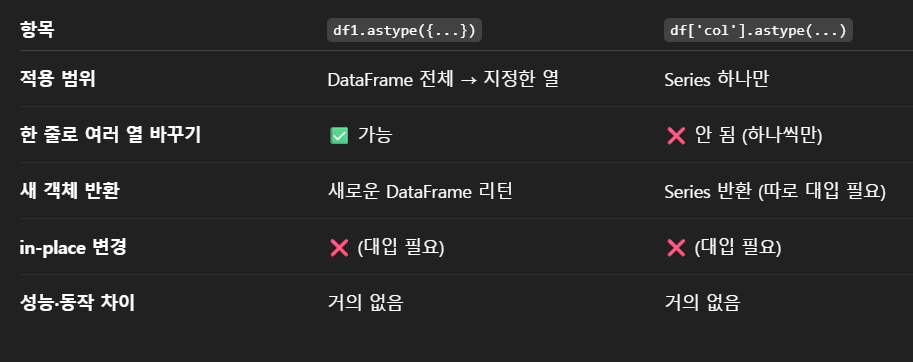

In [ ]:
df1 = df.copy()
df1 = df1.astype({'student_id':'object'})
#답안 코드
#df['student_id'] = df['student_id'].astype('str')

df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, 0 to 6
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   student_id  7 non-null      object 
 1   name        7 non-null      object 
 2   gender      7 non-null      object 
 3   midterm     7 non-null      float64
 4   final       7 non-null      float64
 5   assignment  7 non-null      float64
 6   avg         7 non-null      float64
dtypes: float64(4), object(3)
memory usage: 448.0+ bytes


In [ ]:
df.loc[df['assignment'].idxmax(),:]

,5
student_id,6
name,Frank
gender,M
midterm,95.0
final,97.0
assignment,98.0


In [ ]:
df.loc[df['assignment'].idxmin(),:]

,4
student_id,5
name,Eve
gender,F
midterm,76.0
final,79.0
assignment,77.0


In [ ]:
df['avg'] = (df['midterm'] + df['final'] + df['assignment']) / 3

In [ ]:
df.head(5)

,student_id,name,gender,midterm,final,assignment,avg
0,1,Alice,F,85.0,88.0,95.0,89.333333
1,2,Bob,M,78.0,74.0,82.0,78.000000
2,3,Charlie,M,92.0,94.0,87.0,91.000000
3,4,David,M,88.0,90.0,85.0,87.666667
4,5,Eve,F,76.0,79.0,77.0,77.333333


In [ ]:
df.isna().sum()

#저기 avg에 결측치가 3으로 나온 이유가 답안에서는 mean() 함수를 써서 결측치 무시하고 계산이 되었기 때문에 결측치가 없다고 나옴
#내 코드는 직접 계산식을 썼기 때문에 결측치가 있는 행은 계산이 불가해서 Nan이 되어서 3개 결측치가 나온 것

,0
student_id,0
name,0
gender,0
midterm,0
final,0
assignment,0
avg,0


In [ ]:
df.dropna(inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, 0 to 6
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   student_id  7 non-null      int64  
 1   name        7 non-null      object 
 2   gender      7 non-null      object 
 3   midterm     7 non-null      float64
 4   final       7 non-null      float64
 5   assignment  7 non-null      float64
 6   avg         7 non-null      float64
dtypes: float64(4), int64(1), object(2)
memory usage: 448.0+ bytes


In [ ]:
additional_data = {
    'student_id' : ['1', '3', '5', '7', '9'],
    'club' : ['Art', 'Science', 'Math', 'Music', 'Drama']}

df_additional = pd.DataFrame(additional_data)

In [ ]:
df_additional['student_id'] = df_additional['student_id'].astype('int64')
df_merge = pd.merge(df, df_additional, on = 'student_id', how = 'outer')

In [ ]:
df_merge2 = pd.merge(df, df_additional, on = 'student_id', how = 'left')

In [ ]:
df_merge2

,student_id,name,gender,midterm,final,assignment,avg,club
0,1,Alice,F,85.0,88.0,95.0,89.333333,Art
1,2,Bob,M,78.0,74.0,82.0,78.000000,NaN
2,3,Charlie,M,92.0,94.0,87.0,91.000000,Science
3,4,David,M,88.0,90.0,85.0,87.666667,NaN
4,5,Eve,F,76.0,79.0,77.0,77.333333,Math
5,6,Frank,M,95.0,97.0,98.0,96.666667,NaN
6,7,Grace,F,89.0,91.0,84.0,88.000000,Music


In [ ]:
df_merge

,student_id,name,gender,midterm,final,assignment,avg,club
0,1,Alice,F,85.0,88.0,95.0,89.333333,Art
1,2,Bob,M,78.0,74.0,82.0,78.000000,NaN
2,3,Charlie,M,92.0,94.0,87.0,91.000000,Science
3,4,David,M,88.0,90.0,85.0,87.666667,NaN
4,5,Eve,F,76.0,79.0,77.0,77.333333,Math
5,6,Frank,M,95.0,97.0,98.0,96.666667,NaN
6,7,Grace,F,89.0,91.0,84.0,88.000000,Music
7,9,NaN,NaN,NaN,NaN,NaN,NaN,Drama


In [ ]:
df

,student_id,name,gender,midterm,final,assignment,avg
0,1,Alice,F,85.0,88.0,95.0,89.333333
1,2,Bob,M,78.0,74.0,82.0,78.000000
2,3,Charlie,M,92.0,94.0,87.0,91.000000
3,4,David,M,88.0,90.0,85.0,87.666667
4,5,Eve,F,76.0,79.0,77.0,77.333333
5,6,Frank,M,95.0,97.0,98.0,96.666667
6,7,Grace,F,89.0,91.0,84.0,88.000000


In [ ]:
df_pivot = df.pivot_table(index = 'gender', columns = 'student_id', values = 'avg')

In [ ]:
df_pivot

student_id,1,2,3,4,5,6,7
gender,,,,,,,
F,89.333333,NaN,NaN,NaN,77.333333,NaN,88.0
M,NaN,78.0,91.0,87.666667,NaN,96.666667,NaN


In [ ]:
df.loc[df['student_id'] == 9]

,student_id,name,gender,midterm,final,assignment
8,9,Ivan,M,77.0,NaN,81.0


In [ ]:
 df['average'] = df[['midterm', 'final','assignment']].mean(axis=1)

In [ ]:
melt_df = pd.melt(df, id_vars = ['student_id','name','gender'], value_vars = ['midterm', 'final', 'assignment','average'], var_name = 'variable', value_name = 'score')

In [ ]:
melt_df

,student_id,name,gender,variable,score
0,1,Alice,F,midterm,85.000000
1,2,Bob,M,midterm,78.000000
2,3,Charlie,M,midterm,92.000000
3,4,David,M,midterm,88.000000
4,5,Eve,F,midterm,76.000000
5,6,Frank,M,midterm,95.000000
6,7,Grace,F,midterm,89.000000
7,8,Hannah,F,midterm,90.000000
8,9,Ivan,M,midterm,77.000000
9,10,Jack,M,midterm,NaN


In [ ]:
group_mean

,gender,variable,score
0,F,assignment,85.333333
1,F,average,86.416667
2,F,final,87.500000
3,F,midterm,85.000000
4,M,assignment,86.833333
5,M,average,86.555556
6,M,final,88.200000
7,M,midterm,86.000000


In [ ]:
max_avg_student_idx = df['average'].idxmax()
max_avg_student = df.loc[max_avg_student_idx,['name','average']]
max_avg_student

,5
name,Frank
average,96.666667


In [ ]:
df.loc[max_avg_student_idx, :]

,5
student_id,6
name,Frank
gender,M
midterm,95.0
final,97.0
assignment,98.0
average,96.666667


# ch2-2 Pandas 날짜, 문자열 처리

In [ ]:
import pandas as pd

data = {
    'date' : ['2023-01-01 12:34:56', '2023-01-02 23:45:01', '2023-01-03 06:07:08', '2023-01-04 14:15:16'],
    'value' : [100,201,302,404]
}

df = pd.DataFrame(data)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    4 non-null      object
 1   value   4 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 196.0+ bytes


In [ ]:
df

,date,value
0,2023-01-01 12:34:56,100
1,2023-01-02 23:45:01,201
2,2023-01-03 06:07:08,302
3,2023-01-04 14:15:16,404


In [ ]:

df['date'] = pd.to_datetime(df['date'])
print(df.dtypes)

date     datetime64[ns]
value             int64
dtype: object


In [ ]:
pd.to_datetime('02-2024-01')

DateParseError: day is out of range for month: 02-2024-01, at position 0

In [ ]:
pd.to_datetime('02-2024-01', format = "%m-%Y-%d")

Timestamp('2024-02-01 00:00:00')

In [ ]:
pd.to_datetime('2024년 3월 22일', format = '%Y년 %m월 %d일')   #한글 포함된 경우

Timestamp('2024-03-22 00:00:00')

In [ ]:
#날짜 정보 추출
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['wday'] = df['date'].dt.day_name()
df['wday2'] = df['date'].dt.weekday
df['hour'] = df['date'].dt.hour
df['minute'] = df['date'].dt.minute
df['second'] = df['date'].dt.second
df['date'].dt.date
df.head(2)

,date,value,year,month,day,wday,wday2,hour,minute,second
0,2023-01-01 12:34:56,100,2023,1,1,Sunday,6,12,34,56
1,2023-01-02 23:45:01,201,2023,1,2,Monday,0,23,45,1


In [ ]:
#날짜 차이 계산
current_date = pd.to_datetime('2024-05-01')
df['days_diff'] = (current_date - df['date']).dt.days

In [ ]:
df

,date,value,year,month,day,wday,wday2,hour,minute,second,days_diff
0,2023-01-01 12:34:56,100,2023,1,1,Sunday,6,12,34,56,485
1,2023-01-02 23:45:01,201,2023,1,2,Monday,0,23,45,1,484
2,2023-01-03 06:07:08,302,2023,1,3,Tuesday,1,6,7,8,483
3,2023-01-04 14:15:16,404,2023,1,4,Wednesday,2,14,15,16,482


In [ ]:
date_range = pd.date_range(start = '2021-01-01', end='2021-12-01', freq = 'M')

<ipython-input-36-adc66de675dd>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  date_range = pd.date_range(start = '2021-01-01', end='2021-12-01', freq = 'M')


In [ ]:
date_range

DatetimeIndex(['2021-01-31', '2021-02-28', '2021-03-31', '2021-04-30',
               '2021-05-31', '2021-06-30', '2021-07-31', '2021-08-31',
               '2021-09-30', '2021-10-31', '2021-11-30'],
              dtype='datetime64[ns]', freq='ME')

In [ ]:
df['new_date'] = pd.to_datetime(dict(year=df.year, month = df.month, day= df.day))

In [ ]:
df.head()

,date,value,year,month,day,wday,wday2,hour,minute,second,days_diff,new_date
0,2023-01-01 12:34:56,100,2023,1,1,Sunday,6,12,34,56,485,2023-01-01
1,2023-01-02 23:45:01,201,2023,1,2,Monday,0,23,45,1,484,2023-01-02
2,2023-01-03 06:07:08,302,2023,1,3,Tuesday,1,6,7,8,483,2023-01-03
3,2023-01-04 14:15:16,404,2023,1,4,Wednesday,2,14,15,16,482,2023-01-04


## 기타 메소드
- str.len() : 길이 출력
  - df['컬럼명'] = df['컬럼명'].str.len()
- str.lower() : 대소문자 변환
  - df['컬럼명'].str.lower()
- str.upper() : 대소문자 변환
  - df['컬럼명'].str.upper()
- str.contains('문자') : 특정 문자 포함 여부 확인
  - df['컬럼명'].str.contains('a')
- str.replace : 문자열 교체
  - df['컬럼명'].str.replace('L', 'HHHG')
- str.split('a', expand=True) 열마다 확장 : 문자열 분할
  - df['컬럼명'].str.split('a')
- str.cat() : 문자열 결합
  - df['컬럼명'].str.cat(df['컬럼'], sep=',')
- str.strip() : 공백제거
  - df['컬럼명'].str.strip()

## 정규표현식

In [4]:
data = {
    '주소' : ['서울특별시 강남구 테헤란로 123', '부산광역시 해운대구 센텀중앙로 45', '대구광역시 수성구 동대구로77-$9!', '인천광역시 남동구 예술로 501@@, 아트센터','광주광역시 북구 용봉로 123']
    }

import pandas as pd

df = pd.DataFrame(data)
df

,주소
0,서울특별시 강남구 테헤란로 123
1,부산광역시 해운대구 센텀중앙로 45
2,대구광역시 수성구 동대구로77-$9!
3,"인천광역시 남동구 예술로 501@@, 아트센터"
4,광주광역시 북구 용봉로 123


In [5]:
df['도시'] = df['주소'].str.extract(r'([가-힣]+광역시)',expand = True)

In [6]:
df

,주소,도시
0,서울특별시 강남구 테헤란로 123,NaN
1,부산광역시 해운대구 센텀중앙로 45,부산광역시
2,대구광역시 수성구 동대구로77-$9!,대구광역시
3,"인천광역시 남동구 예술로 501@@, 아트센터",인천광역시
4,광주광역시 북구 용봉로 123,광주광역시


In [11]:
df['특수문자제거'] = df['주소'].str.replace(r'[^a-zA-Z0-9가-힣]','' , regex=True)

In [12]:
df

,주소,도시,특수문자제거
0,서울특별시 강남구 테헤란로 123,NaN,서울특별시강남구테헤란로123
1,부산광역시 해운대구 센텀중앙로 45,부산광역시,부산광역시해운대구센텀중앙로45
2,대구광역시 수성구 동대구로77-$9!,대구광역시,대구광역시수성구동대구로779
3,"인천광역시 남동구 예술로 501@@, 아트센터",인천광역시,인천광역시남동구예술로501아트센터
4,광주광역시 북구 용봉로 123,광주광역시,광주광역시북구용봉로123


#2-2 연습문제

In [16]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/YoungjinBD/data/main/bike_data.csv')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    435 non-null    object 
 1   season      435 non-null    int64  
 2   holiday     435 non-null    int64  
 3   workingday  435 non-null    int64  
 4   weather     435 non-null    int64  
 5   temp        435 non-null    float64
 6   atemp       435 non-null    float64
 7   humidity    435 non-null    int64  
 8   windspeed   435 non-null    float64
 9   casual      435 non-null    int64  
 10  registered  435 non-null    int64  
 11  count       435 non-null    int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 40.9+ KB


In [18]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-09-05 17:00:00,3,1,0,2,27.06,29.545,89,7.0015,37,77,114
1,2011-05-17 11:00:00,2,0,1,2,22.96,26.515,83,27.9993,26,104,130
2,2011-11-10 09:00:00,4,0,1,2,17.22,21.210,94,7.0015,23,188,211
3,2011-10-13 07:00:00,4,0,1,3,22.14,25.760,100,8.9981,5,76,81
4,2011-10-15 14:00:00,4,0,0,1,24.60,31.060,33,31.0009,242,230,472


계절이 1일때 가장 대여량이 맣은 시간대를 구하시오

In [32]:
df['datetime'] = pd.to_datetime(df['datetime'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    435 non-null    datetime64[ns]
 1   season      435 non-null    int64         
 2   holiday     435 non-null    int64         
 3   workingday  435 non-null    int64         
 4   weather     435 non-null    int64         
 5   temp        435 non-null    float64       
 6   atemp       435 non-null    float64       
 7   humidity    435 non-null    int64         
 8   windspeed   435 non-null    float64       
 9   casual      435 non-null    int64         
 10  registered  435 non-null    int64         
 11  count       435 non-null    int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 40.9 KB


In [33]:
df_season1 = df.loc[df['season'] == 1]
df_season1.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
9,2011-02-06 21:00:00,1,0,0,1,10.66,15.150,60,0.0000,5,22,27
12,2011-02-15 11:00:00,1,0,1,1,10.66,12.120,25,16.9979,11,46,57
15,2012-02-02 10:00:00,1,0,1,3,17.22,21.210,77,7.0015,6,72,78
25,2011-02-01 03:00:00,1,0,1,2,6.56,11.365,69,0.0000,0,2,2
28,2011-03-10 08:00:00,1,0,1,3,15.58,19.695,0,19.0012,1,43,44


In [61]:
df['hour'] = df['datetime'].dt.hour
df_season1.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour
9,2011-02-06 21:00:00,1,0,0,1,10.66,15.15,60,0.0000,5,22,27,21
12,2011-02-15 11:00:00,1,0,1,1,10.66,12.12,25,16.9979,11,46,57,11
15,2012-02-02 10:00:00,1,0,1,3,17.22,21.21,77,7.0015,6,72,78,10


In [45]:
df_season_count = df_season1.groupby(df_season1['hour'])['count'].sum()
df_season_count.sort_values(ascending = False).head(1)

,count
hour,
13,1417


2. 각 계절 별 평균 대여량

In [47]:
df_season_mean = df.groupby(['season'])['count'].mean()
df_season_mean

,count
season,
1,103.169811
2,218.803922
3,265.500000
4,218.581197


1월 동안의 총 대여량

In [49]:
df['month'] = df['datetime'].dt.month
df.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month
0,2011-09-05 17:00:00,3,1,0,2,27.06,29.545,89,7.0015,37,77,114,9
1,2011-05-17 11:00:00,2,0,1,2,22.96,26.515,83,27.9993,26,104,130,5
2,2011-11-10 09:00:00,4,0,1,2,17.22,21.210,94,7.0015,23,188,211,11


In [53]:
df_jan = df.loc[df['month'] == 1]
df_jan['count'].sum()

np.int64(2567)

가장 대여량이 많은 날짜

In [56]:
df.sort_values(by = 'count', ascending = False).head(1)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month
192,2012-09-11 17:00:00,3,0,1,1,28.7,31.82,28,0.0,168,802,970,9


In [59]:
df['datetime'].iloc[df['count'].idxmax()]

Timestamp('2012-09-11 17:00:00')

시간대별 평균 대여량

In [62]:
df.groupby('hour')['count'].mean()

,count
hour,
0,43.500000
1,52.714286
2,32.842105
3,12.000000
4,6.687500
5,17.750000
6,58.705882
7,208.937500
8,483.055556


월요일 동안의 총 대여량

In [68]:
df.head(1)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,hour,days
0,2011-09-05 17:00:00,3,1,0,2,27.06,29.545,89,7.0015,37,77,114,9,17,Monday


In [67]:
df['days'] = df['datetime'].dt.day_name()

In [76]:
df_day = df.groupby('days')['count'].sum()
df_day

,count
days,
Friday,16315
Monday,10191
Saturday,12105
Sunday,11066
Thursday,13319
Tuesday,11198
Wednesday,13839


데이터를 넓은 형식에서 긴 형식으로 변환
casual과 registered열을 하나의 열로 변환

In [77]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,hour,days
0,2011-09-05 17:00:00,3,1,0,2,27.06,29.545,89,7.0015,37,77,114,9,17,Monday
1,2011-05-17 11:00:00,2,0,1,2,22.96,26.515,83,27.9993,26,104,130,5,11,Tuesday
2,2011-11-10 09:00:00,4,0,1,2,17.22,21.210,94,7.0015,23,188,211,11,9,Thursday
3,2011-10-13 07:00:00,4,0,1,3,22.14,25.760,100,8.9981,5,76,81,10,7,Thursday
4,2011-10-15 14:00:00,4,0,0,1,24.60,31.060,33,31.0009,242,230,472,10,14,Saturday


In [78]:
melt_df = df.melt(id_vars = ['datetime', 'season'], value_vars = ['casual', 'registered'], var_name = 'user_type', value_name = 'rental_count')
melt_df.head()

,datetime,season,user_type,rental_count
0,2011-09-05 17:00:00,3,casual,37
1,2011-05-17 11:00:00,2,casual,26
2,2011-11-10 09:00:00,4,casual,23
3,2011-10-13 07:00:00,4,casual,5
4,2011-10-15 14:00:00,4,casual,242


앱 로그 데이터

로그 컬럼에서 연도 정보만 추출

In [79]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/YoungjinBD/data/main/logdata.csv')
df.head()

,로그
0,2024-07-18 12:34:56 User: 홍길동 Action: Login ID...
1,2024-07-18 12:35:00 User: 김철수 Action: Purchase...
2,2024-07-18 12:36:10 User: 이영희 Action: Logout T...
3,2024-07-18 12:37:22 User: 박지성 Action: Login ID...
4,2024-07-18 12:38:44 User: 최강타 Action: Purchase...


In [84]:
df['로그'] = df['로그'].str.strip()

In [88]:
df['date'] = df['로그'].str.extract(r'(\d+)', expand=False)

In [89]:
df

,로그,date
0,2024-07-18 12:34:56 User: 홍길동 Action: Login ID...,2024
1,2024-07-18 12:35:00 User: 김철수 Action: Purchase...,2024
2,2024-07-18 12:36:10 User: 이영희 Action: Logout T...,2024
3,2024-07-18 12:37:22 User: 박지성 Action: Login ID...,2024
4,2024-07-18 12:38:44 User: 최강타 Action: Purchase...,2024
5,2024-07-18 12:39:50 User: 장보고 Action: Logout T...,2024
6,2024-07-18 12:40:56 User: 홍길동 Action: Purchase...,2024
7,2024-07-18 12:41:00 User: 김철수 Action: Login ID...,2024
8,2024-07-18 12:42:10 User: 이영희 Action: Purchase...,2024
9,2024-07-18 12:43:22 User: 박지성 Action: Logout T...,2024


In [90]:
df['time'] = df['로그'].str.extract(r'(\d{2}:\d{2}:\d{2})', expand=False)

In [91]:
df['한글'] = df['로그'].str.extract(r'([가-힣]+)', expand=False)

In [95]:
df['제거'] = df['로그'].str.replace(r'[^a-zA-Z0-9가-힣\s]', '', regex = True)

In [98]:
df.head()

,로그,date,time,한글,제거
0,2024-07-18 12:34:56 User: 홍길동 Action: Login ID...,2024,12:34:56,홍길동,20240718 123456 User 홍길동 Action Login ID12345
1,2024-07-18 12:35:00 User: 김철수 Action: Purchase...,2024,12:35:00,김철수,20240718 123500 User 김철수 Action Purchase Amoun...
2,2024-07-18 12:36:10 User: 이영희 Action: Logout T...,2024,12:36:10,이영희,20240718 123610 User 이영희 Action Logout Time 30s
3,2024-07-18 12:37:22 User: 박지성 Action: Login ID...,2024,12:37:22,박지성,20240718 123722 User 박지성 Action Login ID67890
4,2024-07-18 12:38:44 User: 최강타 Action: Purchase...,2024,12:38:44,최강타,20240718 123844 User 최강타 Action Purchase Amoun...


In [101]:
df['amount'] = df['로그'].str.extract(r'Amount: \s*(\d+)').astype(float)
df['user'] = df['로그'].str.extract(r'User: \s*([가-힣]+)')
grouped = df.groupby('user')['amount'].mean().reset_index()



In [103]:
grouped

,user,amount
0,김철수,3666.666667
1,박지성,5750.000000
2,이영희,4250.000000
3,장보고,5750.000000
4,최강타,3750.000000
5,홍길동,4250.000000


In [105]:
df.head()

,로그,date,time,한글,제거,amount,user
0,2024-07-18 12:34:56 User: 홍길동 Action: Login ID...,2024,12:34:56,홍길동,20240718 123456 User 홍길동 Action Login ID12345,NaN,홍길동
1,2024-07-18 12:35:00 User: 김철수 Action: Purchase...,2024,12:35:00,김철수,20240718 123500 User 김철수 Action Purchase Amoun...,2000.0,김철수
2,2024-07-18 12:36:10 User: 이영희 Action: Logout T...,2024,12:36:10,이영희,20240718 123610 User 이영희 Action Logout Time 30s,NaN,이영희
3,2024-07-18 12:37:22 User: 박지성 Action: Login ID...,2024,12:37:22,박지성,20240718 123722 User 박지성 Action Login ID67890,NaN,박지성
4,2024-07-18 12:38:44 User: 최강타 Action: Purchase...,2024,12:38:44,최강타,20240718 123844 User 최강타 Action Purchase Amoun...,1500.0,최강타
